# Random variables 02

##### Josep Fortiana 2018-10-01

In [1]:
source("Random.Vars.r")

## Expectation, variance, moments of a discrete random variable

In [2]:
x<-c(1,2,3,4)
d<-c(0.2, 0.3, 0.4, 0.1)
EX<-sum(x*d)
EX

#### A function to compute the expectation of a discrete r.v.

In [3]:
E<-function(x,d){
    EX<-sum(x*d)
    return(EX)
    }

#### Variance of a random variable

In [4]:
# deviations with respect to the expectation
D<-x-EX
D2<-D^2
# Variance is the expectation of the squared deviations w.r.t. the expectation
VarX<-E(D2,d)
VarX

[1] 0.84

#### A function to compute the variance of a discrete r.v.

In [5]:
Var<-function(x,d){
    EX<-E(x,d)
    D2<-(x-EX)^2
    VarX<-E(D2,d)
    return(VarX)
}
Var(x,d)

[1] 0.84

#### Moments of a discrete r.v.

For each positive integer $k$, the expectation of $X^k$.

For $k=1$, $M_1$ is the expectation.

In [6]:
M<-function(x,d,k){
    Mk<-E(x^k,d)
    return(Mk)
}
M(x,d,1)
MX2<-M(x,d,2)

[1] 2.4

#### Variance in terms of moments

Identity, the variance is the difference between the second moment and the first moment squared:
$\operatorname{var}(X)=\operatorname{E}(X^{2})-(\operatorname{E}(X))^2$

In [7]:
round(M(x,d,2)-E(x,d)^2,4)

[1] 0.84

#### Example: expectation of a binomial r.v.

Repeat these computations with different parameters $n$ and $\theta$

In [8]:
n<-25
theta<-0.35
x<-0:n # Values vector
d<-dbinom(x,size=n,prob=theta)
EX<-E(x,d)
EX
# Actually there is a closed formula
n*theta

[1] 8.75

[1] 8.75

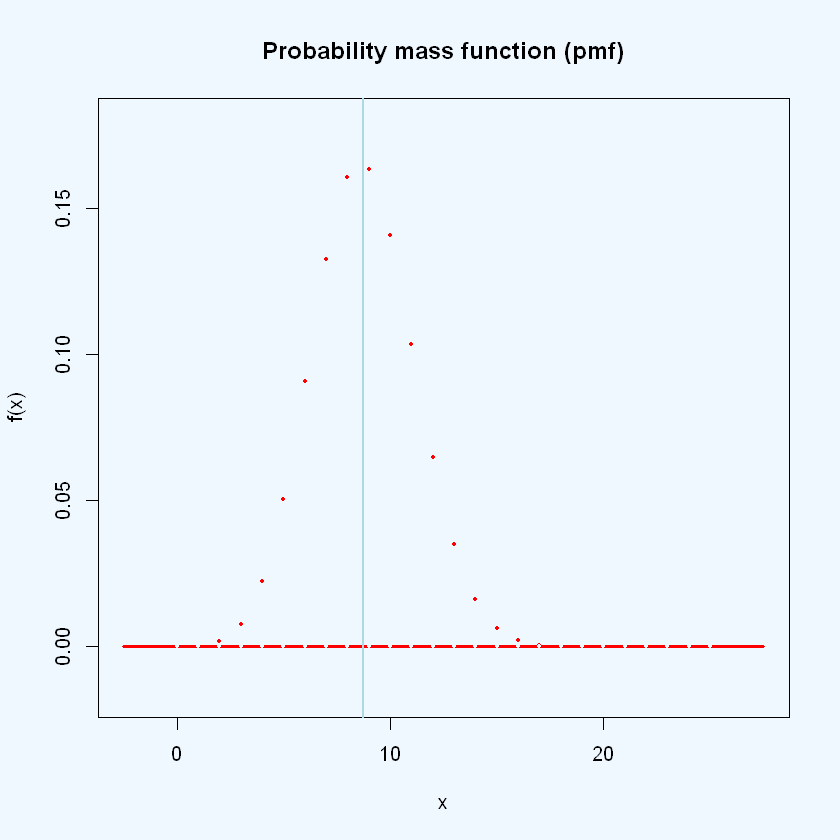

In [9]:
plotmass(x,d)
abline(v=EX,col="LightBlue",lwd=2)

## Expectation, variance, moments of a continuous random variable

#### Expectation, etc., of a continuous r.v.

If $X$ is a continuous r.v. with pdf $f$, we define:
	
$$
	\operatorname{E}(X)=\int_{-\infty}^{\infty}x\,f(x)\,dx,
$$

if this integral exists. Similarly for a function $g(X)$ of a continuous r.v. $X$:

$$
    \operatorname{E}(g(X))=\int_{-\infty}^{\infty}g(x)\,f(x)\,dx.
$$

In particular, moments, variance.

For some easy cases it is possible to obtain expectations analytically. For most interesting cases, expectations will be obtained by:

(1) Approximation

(2) Simulation

#### Example: expectation of a gamma distribution

The pdf of a $\operatorname{Gamma}(\alpha,\beta)$ r.v., with _shape_ parameter $\alpha>0$ and _rate_ parameter 
$\beta>0$ is:

$$
    f(x|\alpha,\beta)=\dfrac{\beta^{\alpha}}{\Gamma(\alpha)}\,x^{\alpha-1}\,\exp\{-\beta\,x\},
    \mskip20mu x>0.
$$

##### Remark:

_Read the Wikipedia article about the gamma distribution._

[1] 1.829267

[1] 1.82927

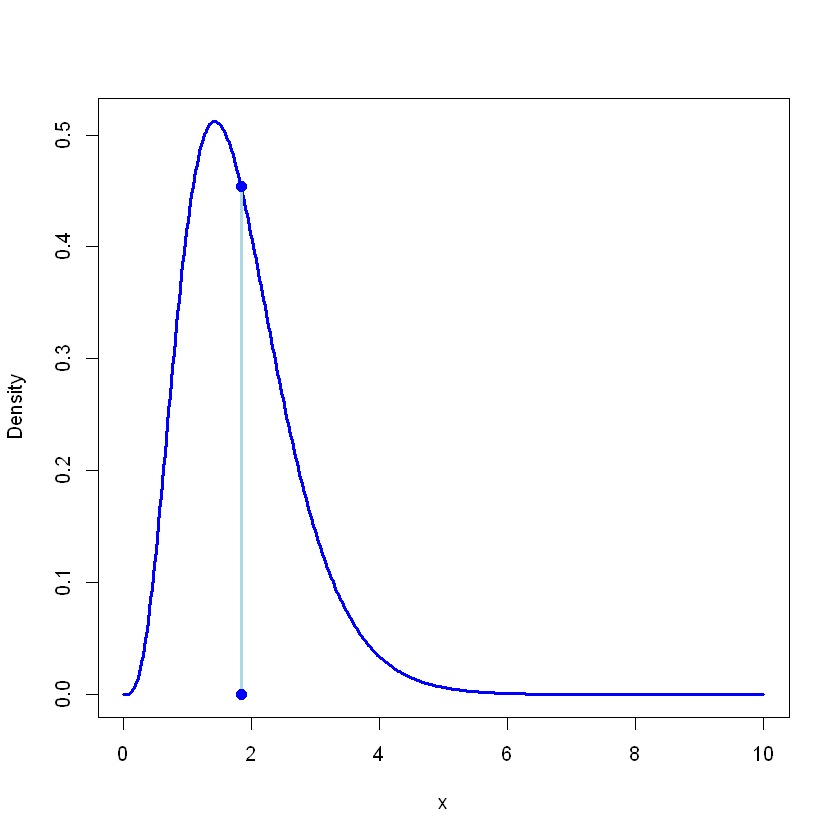

In [10]:
alpha<-4.5
beta<-2.46
xm<-10 # A tentative maximum x value, depending on alpha and beta (pdf should be almost zero there)
x<-seq(0,xm,length=500)
plot(x,dgamma(x,shape=alpha,rate=beta),type="l",lwd=2.5,col="blue",ylab="Density")
# Expectation by numerical integration
xf<-function(x,...){x*dgamma(x,...)}
EX<-integrate(xf,lower=0,upper=xm,shape=alpha,rate=beta)$value
EX
# Actually the expectation of a gamma pdf has a closed formula expression:
round(alpha/beta,5)
lines(c(EX,EX),c(0,dgamma(EX,shape=alpha,rate=beta)),lwd=2.5,col="LightBlue")
points(c(EX,EX),c(0,dgamma(EX,shape=alpha,rate=beta)),pch=19,cex=1.2,col="blue")

## Law of large numbers (LLN)

In $n$ independent repetitions of a binary experiment where a given event $A$ with $\operatorname{P}(A)=p$, the r.v.
$X_{n}\sim\operatorname{Binom}(n,p)$ is the number of occurrences, _absolute frequency,_ of $A$. Dividing $X_{n}$ by $n$, we obtain the _relative frequency_ of $A$:

$$
	f_{n}=\dfrac{X_{n}}{n}.
$$

Its values are: $\{k/n: 0\leq k\leq n\}$. When $n$ increases,

$$
	\{f_{n}\}\stackrel{n\to\infty}\longrightarrow p.
$$

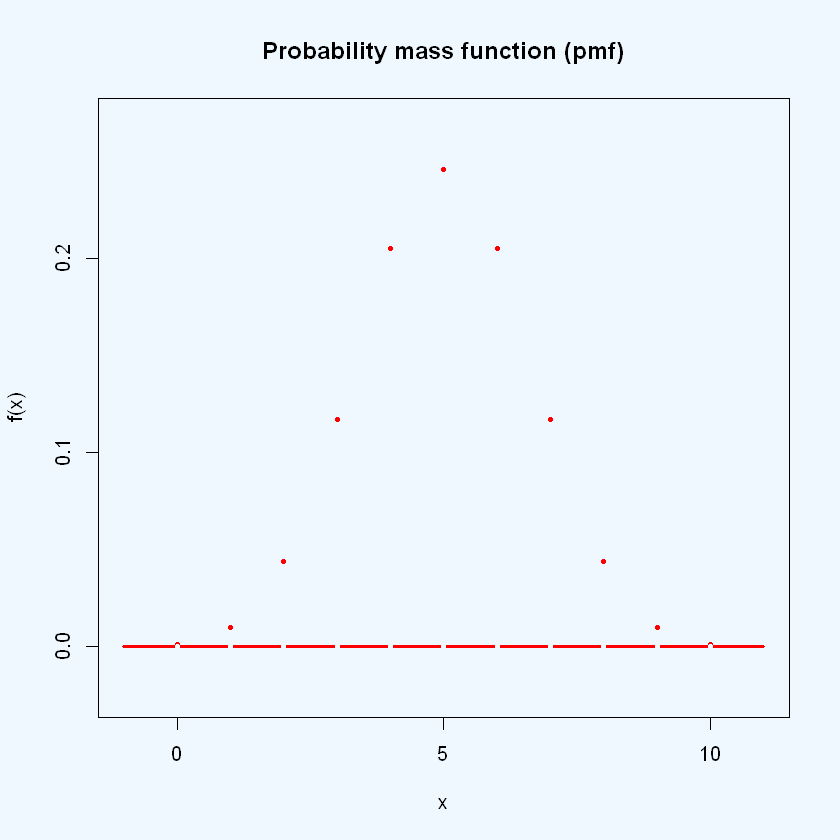

In [11]:
# Binomial B(10,0.5) r.v.
n<-10
p<-0.5
x<-0:n
d<-dbinom(x, size=n,prob=p)
plotmass(x,d)

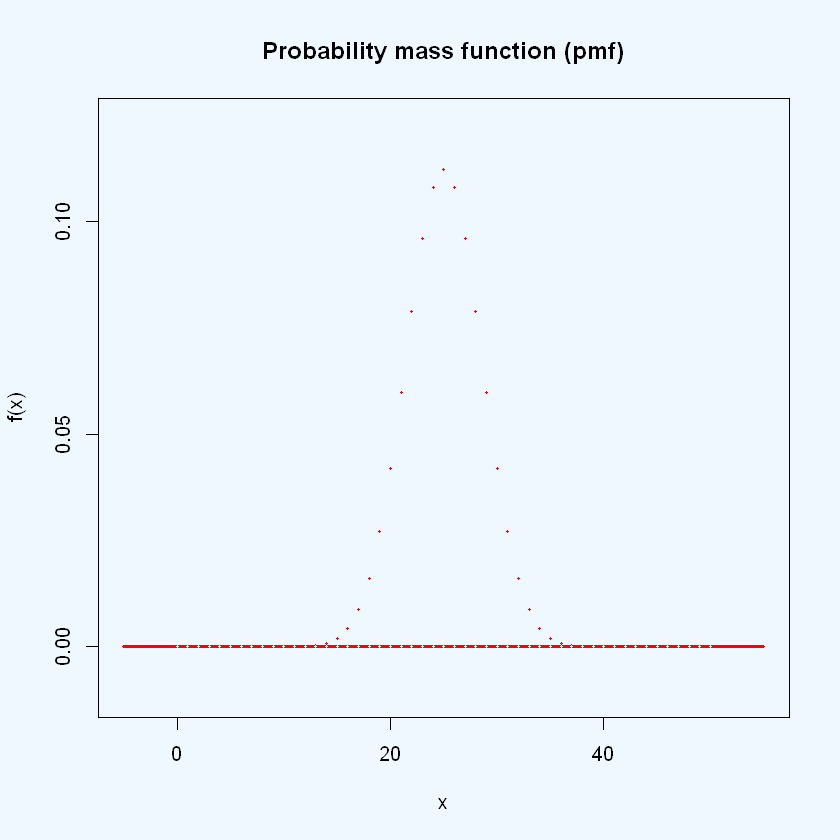

In [12]:
# Binomial B(50,0.5) r.v.
n<-50
p<-0.5
x<-0:n
d<-dbinom(x, size=n,prob=p)
plotmass(x,d)

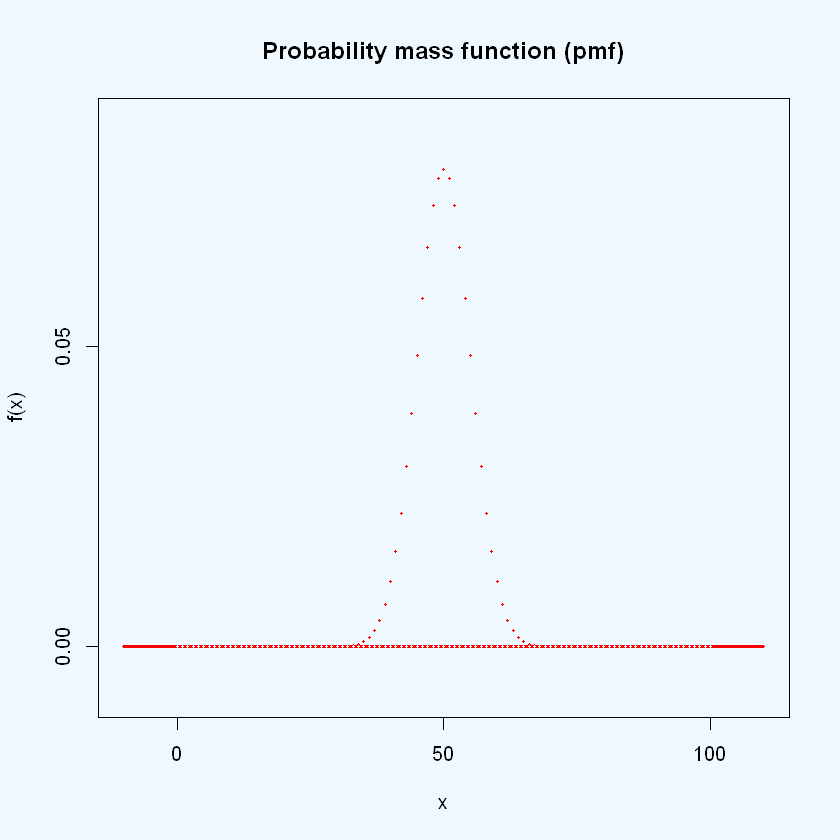

In [13]:
# Binomial B(100,0.5) r.v.
n<-100
p<-0.5
x<-0:n
d<-dbinom(x, size=n,prob=p)
plotmass(x,d)

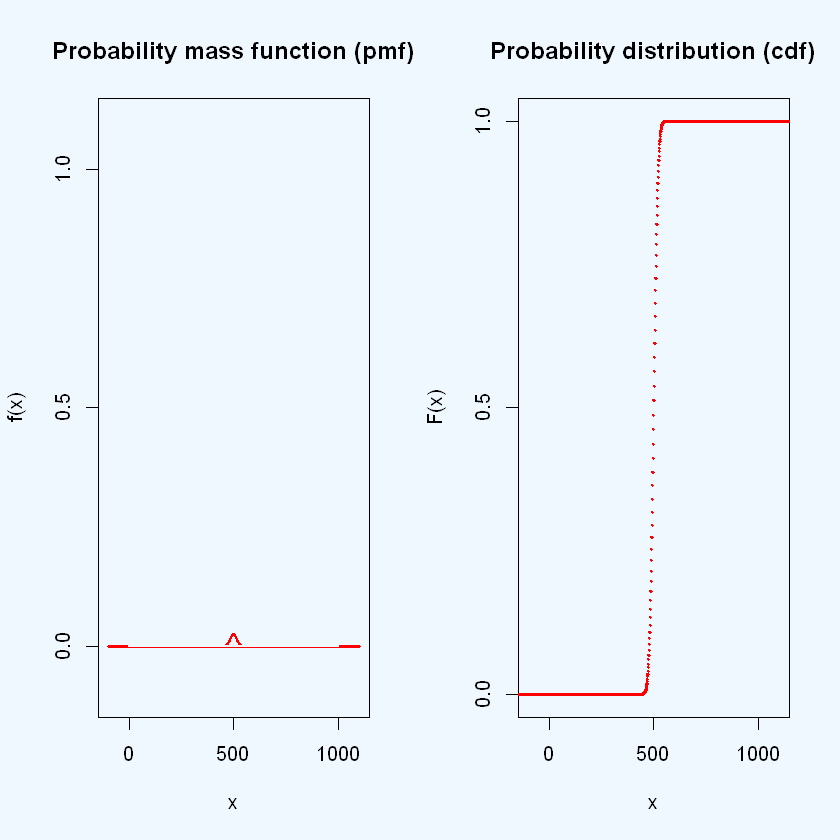

In [14]:
# Binomial B(1000,0.5) r.v.
n<-1000
p<-0.5
x<-0:n
d<-dbinom(x, size=n,prob=p)
plotmassdist(x,d)

Values closer to $p$ have higher probability. The distribution tends to a constant r.v. with value $p$. When $n\to\infty$ values with a significant probability are few and close to $p$, e.g., when $p=0.5$ and $n=1000$ only $81$ values of $f_{n}$ have probability $>0.001$.

In [15]:
sum(d>0.001)

[1] 81

## Central limit theorem (CLT)

#### Sum of independent normal r.v.'s

Normal r.v.'s are closed under the operation _"Sum of independent r.v.'s":_

If $X_{1}\sim\operatorname{N}(\mu_{1},\sigma_{1}^{2})$, $X_{2}\sim\operatorname{N}(\mu_{2},\sigma_{2}^{2})$ and they are independent:

$$
	X_{1}+X_{2}\sim\operatorname{N}(\mu_{1}+\mu_{2},\sigma_{1}^{2}+\sigma_{2}^{2}).
$$

Hence the sum $\sum_{i=1}^{n}X_i$ of $n$ r.v., i.i.d.$\sim\operatorname{N}(\mu,\sigma^{2})$ is a normal r.v.,with mean $n\cdot\mu$ and variance $n\,\sigma^{2}$.  Also, the average:

$$
    \dfrac{1}{n}\,\sum_{i=1}^{n}X_i\sim\operatorname{N}\big(\mu,\dfrac{\sigma^{2}}{n}\big)
$$

#### Central Limit Theorem (CLT): What happens when non-normal r.v.'s are added?

The sum of $n$ independent r.v.'s  is approximately normal, assuming some regularity conditions.
The approximation improves as $n\to\infty$.

In particular, in the binomial examples above, if $X_{n}\sim\operatorname{Binom}(n,p)$, 

$$
	X_{n}\approx\operatorname{N}(np,np(1-p)),
$$

the larger is $n$ the better is the approximation.

## Discrete bivariate distributions

#### Joint pmf for two discrete variables

The _joint pmf_  of a pair of discrete r.v. $(X,Y)$ is:

$$
	h(x,y)\equiv\operatorname{P}\left(\{X=x,Y=y\}\right),\quad(x,y)\in\mathbb{R}^{2}.
$$

Example:

$$
\begin{array}{l|c|c|c|c}
			&X=1&X=2&X=3\\
\hline
	Y=0	&0.90	&0.03	&0.02   &0.95\\
\hline
	Y=1 &0.01  	&0.02	&0.02 	&0.05\\
\hline
		&0.91	&0.05	&0.04   &1\\
\end{array}
$$

As a matrix, each $(i,j)$-th entry is $\operatorname{P}(X=j, Y=i)$.

In [16]:
h<-matrix(c(0.90,0.03,0.02,0.01,0.02,0.02),nrow=2,ncol=3,byrow=TRUE)
Xvals<-c(1,2,3)
Yvals<-c(0,1)
dimnames(h)<-list(Y=as.factor(Yvals),X=as.factor(Xvals))
print(h)
# check that h is, indeed a joint pmf
paste("sum(h)=",sum(h))

   X
Y      1    2    3
  0 0.90 0.03 0.02
  1 0.01 0.02 0.02


[1] "sum(h)= 1"

#### Joint cdf for two r.v.'s

The _Joint cumulative probability distribution function (cdf)_ of a pair of r.v.'s $(X,Y)$ is:
	
$$
    \begin{array}{llcl}
    H: 	&\mathbb{R}^{2}&\rightarrow	&[0,1]\\
		&(x,y) &\mapsto		&
				H(x,y)\equiv
				\operatorname{P}\left(\{X\leq x,Y\leq y\}\right).
    \end{array}
$$
	
This definition is general, for any type of r.v., either discrete, or continuous, or anything else.

#### Probabilities from the joint cdf for two r.v.'s

From $H$, the probability of a rectangle $R\subset\mathbb{R}^{2}$, determined by the
lower left vertex $(x_{1},y_{1})$ and the upper right vertex $(x_{2},y_{2})$ is:

$$
    \operatorname{P}(R)=H((x_{2},y_{2}))-H((x_{1},y_{2}))
        -H((x_{2},y_{1}))+H((x_{1},y_{1})).
$$

#### Joint cdf for the example pmf

Given $(x,y)\in\mathbb{R}^{2}$,
    
$$
	H(x,y)=\left\{{\renewcommand{\arraystretch}{1.2}\begin{array}{llll}
	0,		&\text{ if }	&x<1\mskip10mu\text{or }&y<0,\\
	0.9,	&\text{ if }	&1\leq x<2,		&0\leq y< 1,\\
	0.93,	&\text{ if }	&2\leq x<3,		&0\leq y< 1,\\
	0.95,	&\text{ if }	&3\leq x,		&0\leq y< 1,\\
	0.91,	&\text{ if }	&1\leq x<2,		&1\leq y,\\
	0.96,	&\text{ if }	&2\leq x<3,		&1\leq y,\\
	1,		&\text{ if }	&3\leq x,		&1\leq y.
	\end{array}}\right.
$$

#### Marginal univariate pmf's

$f$, the _marginal pmf_ of $X$, is obtained by adding the columns, giving:

$$
	\operatorname{P}(X=1)=0.91,\mskip8mu\operatorname{P}(X=2)=0.05,\mskip8mu\operatorname{P}(X=3)=0.04. 
$$

$g$, the _marginal pmf_ of $Y$, is obtained by adding the rows, giving:

$$
	\operatorname{P}(Y=0)=0.95,\quad \operatorname{P}(Y=1)=0.05. 
$$

In [17]:
# X marginal pmf
f<-t(apply(h,2,sum))
f
# Y marginal pmf
g<-apply(h,1,sum)
g

1,2,3
0.91,0.05,0.04


0    1 
0.95 0.05

#### Marginal univariate cmf's

For $X$ and $Y$, respectively

\begin{eqnarray*}
	F(x)&=&\lim_{y\to\infty}H(x,y),\\
	G(y)&=&\lim_{x\to\infty}H(x,y).
\end{eqnarray*}

This limit is equivalent to _adding,_ for each value of one of the variables, 
the probabilities of all possible values of the other.

#### Independent random variables

$X$, $Y$ are (stochastically) independent if, and only if,

$$
	H(x,y)=H_{0}(x,y)\equiv F(x)\cdot G(y),\quad (x,y)\in\mathbb{R}^{2}.
$$

In terms of the pmf's:

$$
	h(x,y)=h_{0}(x,y)\equiv f(x)\cdot g(y),\quad (x,y)\in\mathbb{R}^{2}.
$$

#### Joint pmf for two independent r.v.'s

$h_{0}$, the independence joint pmf with the same marginals as the table in the example:

$$
\begin{array}{l|c|c|c|c}
            &X=1 &X=2 &X=3\\
\hline
	Y=0	&0.8645	&0.0475	&0.038	&0.95\\
\hline
	Y=1 &0.0455	&0.0025	&0.002	&0.05\\
\hline
			&0.91	&0.05	&0.04	&1\\
\end{array}
$$

In [18]:
h0<-g%*%f
dimnames(h0)<-list(Y=as.factor(Yvals),X=as.factor(Xvals))
print(h0)

   X
Y        1      2     3
  0 0.8645 0.0475 0.038
  1 0.0455 0.0025 0.002


The usual $\chi^2$ statistic is a measure of the difference between the given joint pmf, $h$ and the independence pmf table, $h_{0}$, obtained as the product of its marginals:

$$
    \chi^2=\sum_{x,y}\dfrac{(h(x,y)-h_0(x,y))^2}{h_0(x,y)}
$$

In [19]:
chi2<-sum((h-h0)^2/h0)
paste("chi^2 = ",round(chi2,4))

[1] "chi^2 =  0.3286"

#### Conditional table, given $Y$

The _table of probabilities conditional to_ $Y$, $h(x|y)$, is obtained by dividing each 
row in the original table by its total (marginal probability of that value of $Y$). 

$$
\begin{array}{l|c|c|c|c|}
        &X=1    &X=2    &X=3\\
\hline
	Y=0	&0.9474	&0.0316	&0.0211	&1\\
\hline
	Y=1 &0.2000	&0.4000	&0.4000	&1\\
\hline
\end{array}
$$

Now the $(i,j)$-th entry is $\operatorname{P}(X=j|Y=i)$. This table is also 
called _the matrix of row profiles._

In [20]:
h.Y<-sweep(h,1,g,FUN="/") # | very useful function to avoid explicit loops in R language | 1 along dimention 1 (which means along rows)
round(h.Y,4)
# check that the sum of each row is 1 (each row is a "profile", i.e., a 1-dimensional pmf)
apply(h.Y,1,sum)

,1,2,3
0,0.9474,0.0316,0.0211
1,0.2000,0.4000,0.4000


0 1 
1 1

#### Conditional table, given $X$

The _table of probabilities conditional to_ $X$, or _matrix of column profiles,_
is obtained by dividing each column by its total (marginal probability of that value of $X$). 

$$
\begin{array}{l|c|c|c|c}
			&X=1      &X=2& X=3\\
\hline
        Y=0	&0.9890	  &0.6000	&0.5000\\
\hline
        Y=1 &0.0110   &0.4000	&0.5000\\
\hline
            &1        &1		&1\\
\end{array}
$$

Now the $(i,j)$-th entry is $\operatorname{P}(Y=i|X=j)$.

In [21]:
h.X<-sweep(h,2,f,FUN="/") # | Sweep matrix h along columns
round(h.X,4)
# check that the sum of each column is 1 (each column is a "profile", i.e., a 1-dimensional pmf)
apply(h.X,2,sum)

#| profile is a term that usually means a pmf (a set of probabilities adding up to one.)

,1,2,3
0,0.989,0.6,0.5
1,0.011,0.4,0.5


1 2 3 
1 1 1

#### Covariance of two discrete r.v.'s  $(X,Y)$

Given $h$, joint pmf, we get $\operatorname{E}(X)$, $\operatorname{E}(Y)$, $\operatorname{var}(X)$, $\operatorname{var}(Y)$, from the marginal pmf's $f$ and $g$.
	
The _covariance_ of $(X,Y)$ is:

$$
	\operatorname{cov}(X,Y)\stackrel{d}{=}\sum_{x}\sum_{y}h(x,y)\,(x-\operatorname{E}(X))\,(y-\operatorname{E}(Y)),
$$

where $x$ and $y$ take all values of $X$ and $Y$, respectively.

Alternatively, compute the expectation of the product:

$$
	\operatorname{E}(X\cdot Y)\stackrel{d}{=}\sum_{x}\sum_{y}h(x,y)\,x\,y,
$$

	and, then, use the equality:
	
$$
	\operatorname{cov}(X,Y)=\operatorname{E}(X\cdot Y)-\operatorname{E}(X)\cdot\operatorname{E}(Y).
$$

In [22]:
EX<-E(Xvals,f)
EY<-E(Yvals,g)
varX<-Var(Xvals,f)
varY<-Var(Yvals,g)
paste("E(X) = ",round(EX,3))
paste("E(Y) = ",round(EY,3))
paste("var(X) = ",round(varX,3))
paste("var(Y) = ",round(varY,3))

[1] "E(X) =  1.13"

[1] "E(Y) =  0.05"

[1] "var(X) =  0.193"

[1] "var(Y) =  0.048"

In [23]:
cov<-function(h,Xvals,Yvals){
    # X marginal pmf
    f<-t(apply(h,2,sum))
    # Y marginal pmf
    g<-apply(h,1,sum)
    # X expectation
    EX<-E(Xvals,f)
    # Y expectation
    EY<-E(Yvals,g)
    # X deviations
    Xd<-Xvals-EX
    # y deviations
    Yd<-Yvals-EY
    covXY<-sum((Yd%o%Xd)*h)
    return(covXY)
    }
covXY<-cov(h,Xvals,Yvals)
paste("cov(X,Y) = ",round(covXY,4))

[1] "cov(X,Y) =  0.0535"

For the example:

\begin{align*}
	\operatorname{E}(X)	&= 1.13,		&\quad \operatorname{E}(Y)&=0.05,\\
	\operatorname{var}(X)&=0.1931, 	&\quad\operatorname{var}(Y)	&=0.0475,
\end{align*}

and

$$
	\operatorname{cov}(X,Y)=0.0535.
$$

#### Correlation coefficient of two discrete r.v.'s $(X,Y)$

$$
	\operatorname{cor}(X,Y)\stackrel{d}{=}\dfrac{\operatorname{cov}(X,Y)}{\sqrt{\operatorname{var}(X)\cdot\operatorname{var}(Y)}}.
$$

Normalization of $\operatorname{cov}(X,Y)$, $-1\leq\operatorname{cor}(X,Y)\leq 1$. 
	
$\operatorname{cor}(X,Y)$ measures linear dependence between $X,\,Y$.

In [24]:
corXY<-covXY/sqrt(varX*varY)
paste("cor(X,Y) = ", round(corXY,4))

[1] "cor(X,Y) =  0.5586"

For the example, $\operatorname{cor}(X,Y)=0.5586$.

### Bayes formula for discrete r.v.'s

#### Bayes formula for two discrete variables

Each entry in the conditional table, given $X$, is the result of applying Bayes' formula,

$$
	\operatorname{P}(Y=i|X=j)=\frac{\operatorname{P}(X=j|Y=i)\operatorname{P}(Y=i)}{\operatorname{P}(X=j)},
$$

operating on entries in the $Y$ marginal in the original table, with the conditional table given $Y$.
    
Note the denominator is the total probabilities formula:

$$
	\operatorname{P}(X=j)=\sum_{i}\operatorname{P}(X=j|Y=i)\operatorname{P}(Y=i)=\sum_{i}\operatorname{P}(X=j,Y=i).
$$

#### Interpreting Bayes formula

Each $j$-th column in the  the conditional table, given $X$, is the transform of the _a priori_ $Y$ probabilities column vector, that is, the marginal pmf of $Y$, resulting from entering the knowledge that $\{X=j\}$ has been observed.